# Load Data

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load and preview the data
data_PCA =  pd.read_csv('Data_Cleaned_Analysis.csv')
data_PCA.head(n = 5)

,PAGE_NO,TOTAL_ANNOTATION,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,CATEGORY_ERROR,YEAR,TIME_BIN,IS_WEEKEND,MONTH
0,1,1,Desktop,2023-10-29 09:47:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,True,10
1,1,1,Desktop,2023-10-29 09:54:00,Passing Parameter,116.0.0.0,Chrome,PassingParam,2023,Morning,True,10
2,3,1,Desktop,2023-10-29 22:19:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,True,10
3,3,1,Desktop,2023-10-30 00:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,night,False,10
4,1,1,Desktop,2023-10-30 08:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,2023,Morning,False,10


# Study Data

In [3]:
#Check the shape of the data
data_PCA.shape

(671, 12)

In [4]:
#Check the data types
data_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PAGE_NO           671 non-null    int64 
 1   TOTAL_ANNOTATION  671 non-null    int64 
 2   DEVICE_NAME       671 non-null    object
 3   CREATED_DATE      671 non-null    object
 4   PROCESS_STAGE     671 non-null    object
 5   BROWSER_VERSION   671 non-null    object
 6   BROWSER_NAME      671 non-null    object
 7   CATEGORY_ERROR    671 non-null    object
 8   YEAR              671 non-null    int64 
 9   TIME_BIN          671 non-null    object
 10  IS_WEEKEND        671 non-null    bool  
 11  MONTH             671 non-null    int64 
dtypes: bool(1), int64(4), object(7)
memory usage: 58.4+ KB


In [5]:
# get all list of  columns with data types
filtered_dtypes = data_PCA.dtypes
data_PCA.columns.to_series().loc[filtered_dtypes.index].groupby(filtered_dtypes.astype(str)).groups


{'bool': ['IS_WEEKEND'], 'int64': ['PAGE_NO', 'TOTAL_ANNOTATION', 'YEAR', 'MONTH'], 'object': ['DEVICE_NAME', 'CREATED_DATE', 'PROCESS_STAGE', 'BROWSER_VERSION', 'BROWSER_NAME', 'CATEGORY_ERROR', 'TIME_BIN']}

# Principal Component Analysis(PCA)

In [6]:
#PCA only works with numeric data, so we need to select only the numeric columns
numeric_columns = data_PCA.select_dtypes(include=['float64', 'int64']).columns
# Create a new DataFrame with only the numeric columns
data_numeric = data_PCA[numeric_columns]
data_numeric

,PAGE_NO,TOTAL_ANNOTATION,YEAR,MONTH
0,1,1,2023,10
1,1,1,2023,10
2,3,1,2023,10
3,3,1,2023,10
4,1,1,2023,10
...,...,...,...,...
666,3,6,2025,3
667,1,16,2025,3
668,1,15,2025,3
669,1,2,2025,3


In [7]:
#check Feature for not numeric data
Not_numeric_columns = data_PCA.select_dtypes(exclude=['float64', 'int64']).columns
data_Notnumeric = data_PCA[Not_numeric_columns]
data_Notnumeric


,DEVICE_NAME,CREATED_DATE,PROCESS_STAGE,BROWSER_VERSION,BROWSER_NAME,CATEGORY_ERROR,TIME_BIN,IS_WEEKEND
0,Desktop,2023-10-29 09:47:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,Morning,True
1,Desktop,2023-10-29 09:54:00,Passing Parameter,116.0.0.0,Chrome,PassingParam,Morning,True
2,Desktop,2023-10-29 22:19:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,night,True
3,Desktop,2023-10-30 00:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,night,False
4,Desktop,2023-10-30 08:11:00,Passing Parameter,118.0.0.0,Chrome,PassingParam,Morning,False
...,...,...,...,...,...,...,...,...
666,Desktop,2025-03-24 11:07:00,Doc Editor : Connection Issues during Save Pro...,126.0.0.0,Firefox,DocEditor_DbUpdateErrEntries,Morning,False
667,Desktop,2025-03-04 10:18:00,Doc Editor : Connection Issues during Save Pro...,133.0.0.0,Chrome,DocEditor_ConnectionTimeout,Morning,False
668,Desktop,2025-03-26 15:05:00,Doc Editor : Connection Issues during Save Pro...,134.0.0.0,Chrome,DocEditor_ConnectionTimeout,Afternoon,False
669,Desktop,2025-03-25 12:54:00,Doc Editor : Connection Issues during Save Pro...,134.0.0.0,Chrome,Other,Afternoon,False


In [8]:
#Start PCA

# Take numeric features
Process_data_PCA = data_PCA[['PAGE_NO', 'TOTAL_ANNOTATION', 'YEAR', 'MONTH', 'IS_WEEKEND']].copy()
Process_data_PCA['IS_WEEKEND'] = Process_data_PCA['IS_WEEKEND'].astype(int)

Process_data_PCA

,PAGE_NO,TOTAL_ANNOTATION,YEAR,MONTH,IS_WEEKEND
0,1,1,2023,10,1
1,1,1,2023,10,1
2,3,1,2023,10,1
3,3,1,2023,10,0
4,1,1,2023,10,0
...,...,...,...,...,...
666,3,6,2025,3,0
667,1,16,2025,3,0
668,1,15,2025,3,0
669,1,2,2025,3,0


In [9]:
# Standardize data
scaler = StandardScaler()
Scaled_data_PCA = scaler.fit_transform(Process_data_PCA)

Scaled_data_PCA

array([[-0.35669175, -0.48049071, -0.73699914,  0.33139771,  3.48666929],
       [-0.35669175, -0.48049071, -0.73699914,  0.33139771,  3.48666929],
       [ 0.26658993, -0.48049071, -0.73699914,  0.33139771,  3.48666929],
       ...,
       [-0.35669175,  3.90602994,  1.79903379, -1.48490925, -0.28680667],
       [-0.35669175, -0.16716781,  1.79903379, -1.48490925, -0.28680667],
       [-0.35669175,  0.459478  ,  1.79903379, -1.48490925, -0.28680667]])

In [10]:
#PCA Process
pca = PCA()
Process_pca = pca.fit_transform(Scaled_data_PCA)

Process_pca

array([[-0.90684422,  3.19503032, -0.88755676,  1.12933459, -0.27242692],
       [-0.90684422,  3.19503032, -0.88755676,  1.12933459, -0.27242692],
       [-0.99810204,  3.26404332, -0.2750801 ,  1.14549026, -0.27164859],
       ...,
       [ 3.64899818, -1.19013423,  0.24951652,  2.47097165,  0.09202382],
       [ 2.12320417,  0.16372615, -0.03798123, -1.03935658,  0.24980656],
       [ 2.35794171, -0.04456007,  0.00624919, -0.49930608,  0.22553229]])

In [11]:
# Check the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with the explained variance ratio
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance Ratio'])

# change format (2 decimal places)
explained_variance_df['Explained Variance (%)'] = explained_variance_df['Explained Variance Ratio'].apply(lambda x: f"{x * 100:.2f}%")

# show in percentage
explained_variance_df

,Explained Variance Ratio,Explained Variance (%)
0,0.415065,41.51%
1,0.206785,20.68%
2,0.195168,19.52%
3,0.158746,15.87%
4,0.024235,2.42%


1. PCA 0 show the highest variance that more than 40% 
2. PCA from 0 to 2  sum of variance more than 80%
3. The PCA 0,1,2 is the most useful/important/contributor to the data
4. The PCA 3 and 4 is fewer contributors with below than 20%

In [12]:
# CHECK PCA for all data
# Identify categorical and numeric columns
categorical_cols = ['DEVICE_NAME', 'PROCESS_STAGE', 'CATEGORY_ERROR', 'BROWSER_NAME']
numeric_cols = ['PAGE_NO', 'TOTAL_ANNOTATION', 'YEAR', 'MONTH', 'IS_WEEKEND']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(data_PCA[categorical_cols], drop_first=True)

# Combine numeric and encoded categorical features
X_full = pd.concat([data_PCA[numeric_cols], df_encoded], axis=1)
X_full['IS_WEEKEND'] = X_full['IS_WEEKEND'].astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Apply PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled_full)

#X_pca_full to DataFrame
X_pca_full_dtFrame = pd.DataFrame(X_pca_full, columns=[f'PC{i+1}' for i in range(X_pca_full.shape[1])])

X_pca_full_dtFrame

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,-1.427752,0.068722,-0.100112,0.020894,0.034911,-0.046878,0.020687,-0.632588,0.946249,-1.143372,...,0.171051,-0.245093,-0.170711,-7.008065e-15,-1.038840e-15,-1.736282e-15,2.421473e-16,9.186745e-16,9.998153e-16,-6.357668e-15
1,-1.427752,0.068722,-0.100112,0.020894,0.034911,-0.046878,0.020687,-0.632588,0.946249,-1.143372,...,0.171051,-0.245093,-0.170711,-7.008065e-15,-1.038840e-15,-1.736282e-15,2.421473e-16,9.186745e-16,9.998153e-16,-6.357668e-15
2,-1.460558,0.015212,-0.085378,0.094913,0.013685,-0.043909,-0.026569,-0.687333,1.093282,-1.305749,...,0.112755,-0.234050,-0.171937,-6.897043e-15,-1.038840e-15,-1.750160e-15,2.421473e-16,9.464301e-16,1.027571e-15,-6.357668e-15
3,-1.311925,-0.461096,-0.056736,0.072929,0.022926,-0.057392,-0.000127,0.155994,0.146940,0.232848,...,-0.132175,-0.003140,-0.133410,-4.954152e-15,-9.000616e-16,-1.014638e-15,1.727584e-16,1.057452e-15,9.165485e-16,-4.137222e-15
4,-1.279118,-0.407586,-0.071470,-0.001090,0.044151,-0.060361,0.047129,0.210739,-0.000092,0.395225,...,-0.073879,-0.014183,-0.132184,-5.009664e-15,-8.723061e-16,-1.000760e-15,1.727584e-16,1.029697e-15,8.887930e-16,-4.081711e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,5.008914,-1.507571,0.035960,3.092923,7.039726,-1.920656,-1.379673,0.327494,-1.279640,-0.712132,...,0.040714,0.074435,-0.006278,2.268787e-15,9.687911e-16,1.867800e-16,-1.470446e-15,1.004687e-15,-3.156733e-16,2.304551e-15
667,6.018065,-1.528405,-5.039176,-2.698334,-1.860698,-0.539222,-1.498640,0.834520,-0.424081,0.119004,...,0.374954,-0.154250,0.016921,1.212937e-15,-7.246063e-17,1.010361e-15,-4.313580e-16,3.286163e-17,-1.364521e-16,-4.235031e-15
668,5.954082,-1.512856,-5.005477,-2.684824,-1.847171,-0.523433,-1.472943,0.869451,-0.352232,0.107435,...,0.364608,-0.142856,0.021246,1.212937e-15,-7.246063e-17,1.010361e-15,-4.313580e-16,-7.816068e-17,-1.364521e-16,-3.790942e-15
669,3.348399,-0.246856,0.233285,0.077423,0.122400,0.064772,4.861037,0.730481,0.714690,0.176407,...,0.758765,0.029253,-0.001293,1.046403e-15,-7.663500e-16,-1.154574e-15,-2.266607e-16,-2.030608e-16,-5.318542e-17,-2.014585e-15


In [13]:
# Explained variance
explained_variance_full = pca_full.explained_variance_ratio_

# Format explained variance into DataFrame
explained_variance_full_df = pd.DataFrame({
    'Explained Variance Ratio': explained_variance_full,
    'Explained Variance (%)': [f"{x * 100:.2f}%" for x in explained_variance_full]
})

explained_variance_full_df

,Explained Variance Ratio,Explained Variance (%)
0,1.772881e-01,17.73%
1,1.009719e-01,10.10%
2,8.554588e-02,8.55%
3,8.326272e-02,8.33%
4,8.254746e-02,8.25%
5,8.084173e-02,8.08%
6,5.858950e-02,5.86%
7,4.693942e-02,4.69%
8,4.452106e-02,4.45%
9,4.121248e-02,4.12%


In [14]:
# Check PCA for all data
# Identify categorical and numeric columns
categorical_cols = ['DEVICE_NAME', 'PROCESS_STAGE', 'CATEGORY_ERROR', 'BROWSER_NAME']
numeric_cols = ['PAGE_NO', 'TOTAL_ANNOTATION', 'YEAR', 'MONTH', 'IS_WEEKEND']

# One-hot encode categorical columns
df_encoded = pd.get_dummies(data_PCA[categorical_cols], drop_first=True)

# Combine numeric and encoded categorical features
X_full = pd.concat([data_PCA[numeric_cols], df_encoded], axis=1)
X_full['IS_WEEKEND'] = X_full['IS_WEEKEND'].astype(int)

# Standardize the data
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)

# Apply PCA
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled_full)

# Explained variance
explained_variance_full = pca_full.explained_variance_ratio_

# Format explained variance into DataFrame
explained_variance_full_df = pd.DataFrame({
    'Explained Variance Ratio': explained_variance_full,
    'Explained Variance (%)': [f"{x * 100:.2f}%" for x in explained_variance_full]
})

explained_variance_full_df

,Explained Variance Ratio,Explained Variance (%)
0,1.772881e-01,17.73%
1,1.009719e-01,10.10%
2,8.554588e-02,8.55%
3,8.326272e-02,8.33%
4,8.254746e-02,8.25%
5,8.084173e-02,8.08%
6,5.858950e-02,5.86%
7,4.693942e-02,4.69%
8,4.452106e-02,4.45%
9,4.121248e-02,4.12%


1) PCA 0 and 1 show the highest variance that more than 10% 
2) PCA from 2 to 5 show variance more than 8%
3) The total variance 0 to 5 is more than to 60%
4) Take the 6 PCA 

In [15]:
#the influence of the original features on PCA1 to PCA6 (also known as loading scores). 
# It shows how much each feature contributes to each principal component
components = pca_full.components_[:6]
pca_components_df = pd.DataFrame(components, columns=X_full.columns, index=[f'PC{i+1}' for i in range(6)])
pca_components_df.T.sort_index()

,PC1,PC2,PC3,PC4,PC5,PC6
BROWSER_NAME_Edge,-0.033595,-0.056066,-0.054455,0.017117,-0.058593,-0.012913
BROWSER_NAME_Firefox,-0.019951,-0.101208,-0.097133,-0.025761,0.062349,0.101715
BROWSER_NAME_Safari,0.028701,0.464359,0.069172,-0.025784,-0.028714,0.008758
CATEGORY_ERROR_DocEditor_ConnectionTimeout,0.241903,-0.114883,-0.444296,-0.243027,-0.163971,-0.032528
CATEGORY_ERROR_DocEditor_DbUpdateErrEntries,0.178504,-0.080216,0.023099,0.242417,0.541071,-0.169755
CATEGORY_ERROR_DocEditor_ProviderFailed,0.038702,-0.028319,-0.027597,0.018747,0.147376,0.678904
CATEGORY_ERROR_DocEditor_ReceiveError,0.132599,-0.150685,0.482280,-0.405960,-0.008520,0.000193
CATEGORY_ERROR_DocEditor_connection_closed,0.154168,-0.118320,0.186498,0.453968,-0.389306,0.045684
CATEGORY_ERROR_Other,0.122665,-0.023463,0.017111,0.003179,0.009769,0.006200
CATEGORY_ERROR_PassingParam,-0.407075,0.235138,-0.091684,0.011336,0.003571,-0.004421


1.PC1 (First Principal Component): Most dominant feature:

- YEAR (+0.436): means the year value greatly affects PC1.
- CATEGORY_ERROR_DocEditor_ConnectionTimeout (+0.242)
- TOTAL_ANNOTATION (+0.204)
- CATEGORY_ERROR_PassingParam (−0.407) → strong negative impression.
- MONTH (−0.353)

2.PC2: Dominant features:

- DEVICE_NAME_Mobile (+0.503)
- PROCESS_STAGE_Doc Editor : Passing Parameters (+0.497)
- CATEGORY_ERROR_PassingParam (+0.235)

3.PC3: Most influenced by:

- CATEGORY_ERROR_DocEditor_ReceiveError (+0.482)
- CATEGORY_ERROR_DocEditor_ConnectionTimeout (−0.444)

4.PC4–PC6: More influenced by a combination of category errors such as:

- CATEGORY_ERROR_DocEditor_DbUpdateErrEntries
- CATEGORY_ERROR_DocEditor_connection_closed
- CATEGORY_ERROR_DocEditor_ProviderFailed




# Conclusion

1.PCA1–PCA3 is sufficient to represent the main variation in the data and is influenced by the combination of year, error category, and device type.

2.PC4–PC6 still capture variation but in a smaller and more specific context (usually for further analysis if more detail is desired).

# Plot The Graph

In [16]:
import matplotlib.pyplot as plt
import numpy as np

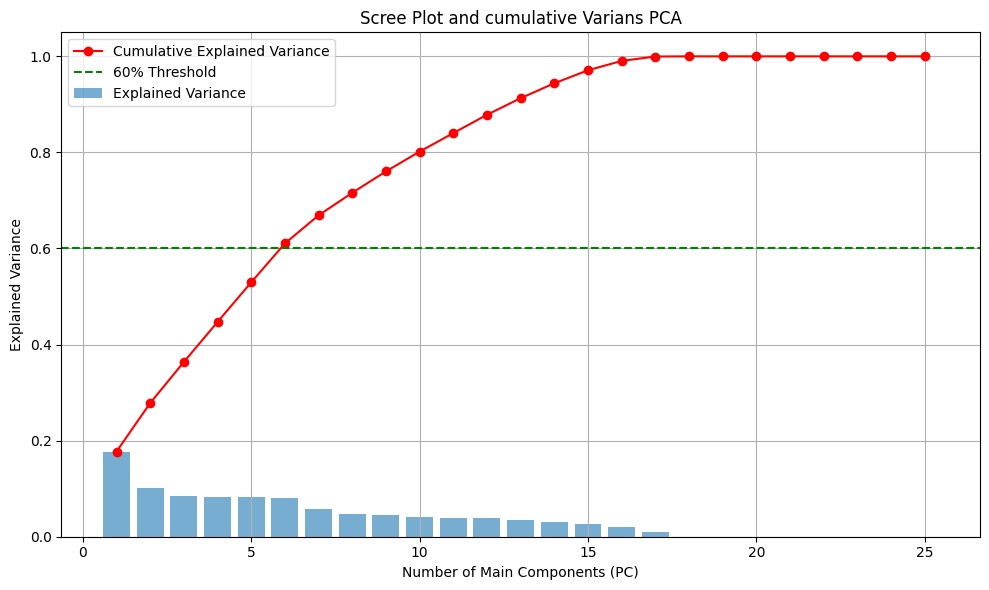

In [17]:
#calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_full)

# Plot scree plot and cumulative plot
plt.figure(figsize=(10, 6))

# Scree plot - bar
plt.bar(range(1, len(explained_variance_full)+1), explained_variance_full, alpha=0.6, label='Explained Variance')

# Cumulative plot - line
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='red', label='Cumulative Explained Variance')

# add line for 60% threshold 
plt.axhline(y=0.60, color='green', linestyle='--', label='60% Threshold')

# Label dan tajuk
plt.title('Scree Plot and cumulative Varians PCA')
plt.xlabel('Number of Main Components (PC)')
plt.ylabel('Explained Variance')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
#keep only the first 6 components
pca_reduced = X_pca_full[:, :6]

pca_reduced

array([[-1.42775155,  0.06872208, -0.100112  ,  0.02089391,  0.03491078,
        -0.04687805],
       [-1.42775155,  0.06872208, -0.100112  ,  0.02089391,  0.03491078,
        -0.04687805],
       [-1.46055814,  0.01521167, -0.08537816,  0.09491345,  0.01368547,
        -0.04390918],
       ...,
       [ 5.95408196, -1.51285625, -5.0054774 , -2.68482382, -1.8471705 ,
        -0.52343343],
       [ 3.34839949, -0.24685634,  0.2332851 ,  0.07742288,  0.12240004,
         0.06477169],
       [ 1.7262552 ,  1.62786347, -0.36871381,  0.11824283, -0.29608342,
        -0.03402835]])

In [19]:
#to DataFrame
pca_reduced_df = pd.DataFrame(pca_reduced, columns=[f'PC{i+1}' for i in range(6)])
pca_reduced_df


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.427752,0.068722,-0.100112,0.020894,0.034911,-0.046878
1,-1.427752,0.068722,-0.100112,0.020894,0.034911,-0.046878
2,-1.460558,0.015212,-0.085378,0.094913,0.013685,-0.043909
3,-1.311925,-0.461096,-0.056736,0.072929,0.022926,-0.057392
4,-1.279118,-0.407586,-0.071470,-0.001090,0.044151,-0.060361
...,...,...,...,...,...,...
666,5.008914,-1.507571,0.035960,3.092923,7.039726,-1.920656
667,6.018065,-1.528405,-5.039176,-2.698334,-1.860698,-0.539222
668,5.954082,-1.512856,-5.005477,-2.684824,-1.847171,-0.523433
669,3.348399,-0.246856,0.233285,0.077423,0.122400,0.064772


# Load Data

In [20]:
#Write the data to a CSV file
pca_reduced_df.to_csv('Data_PCA.csv',
                           index = False)

In [21]:
#Write the new DataFrame as a pickle file
pca_reduced_df.to_pickle('Data_PCA_2.pickle')